In [11]:
# Workflow
# Example of a torch project

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# 1: Data (how to prepare and load data)
# Get data in numerical representation (into tensors)


# 2: Build the model

device(type='cuda')

In [23]:
X = torch.arange(0, 30)
Y = torch.arange(30, 60)
# Y = a + bX -> a = 30 and b = 1 linear regression

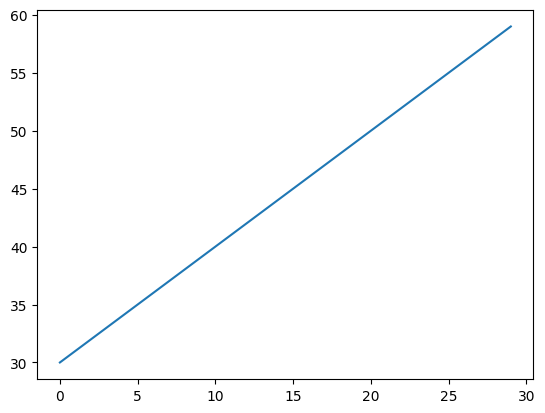

In [ ]:
plt.plot(X, Y)

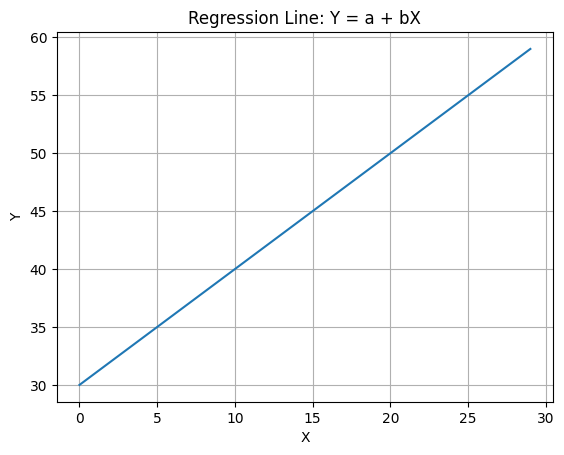

In [19]:
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [26]:
weight = 1
bias = 30

X = torch.arange(0, 30).unsqueeze(dim=1)
X

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29]])

In [28]:
Y = weight * X + bias
Y

tensor([[30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56],
        [57],
        [58],
        [59]])

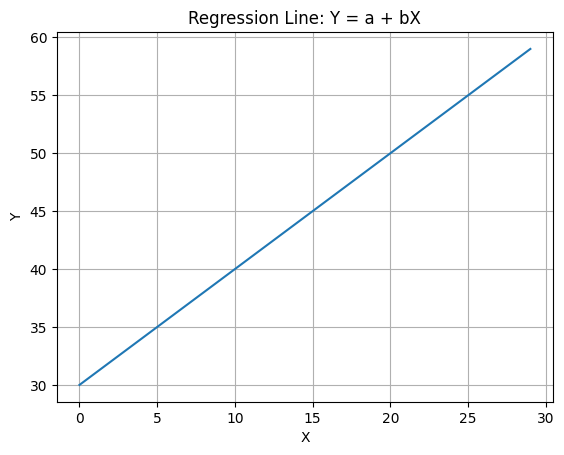

In [29]:
fig, ax = plt.subplots()
ax.plot(X.squeeze(), Y.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [31]:
# Splitting data training set, validation set, test set
weight = 1
bias = 30
SAMPLES = 1000

X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

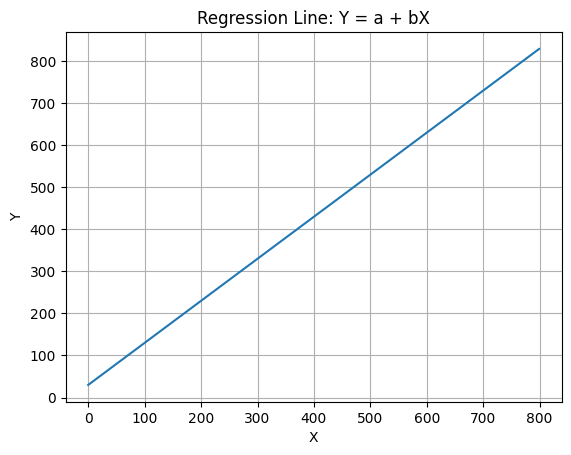

In [32]:
fig, ax = plt.subplots()
ax.plot(X_train.squeeze(), Y_train.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [37]:
def pp(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize=(10, 10))
    
    # plotting the train and test
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

    # predictions
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
    plt.legend(prop={"size" : 14})

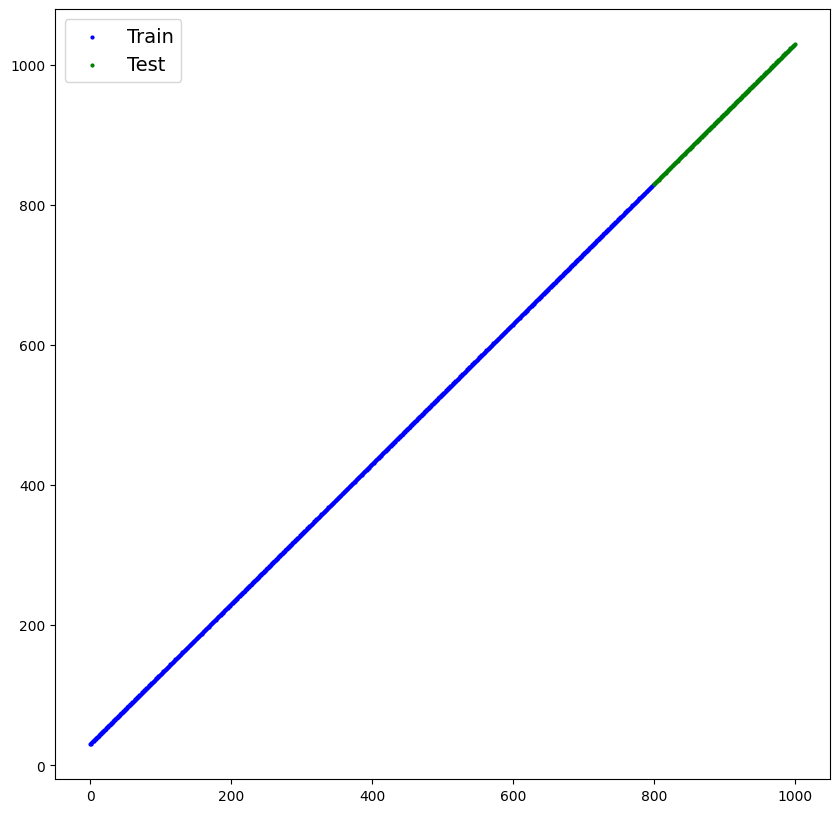

In [38]:
pp(X_train, Y_train, X_test, Y_test)

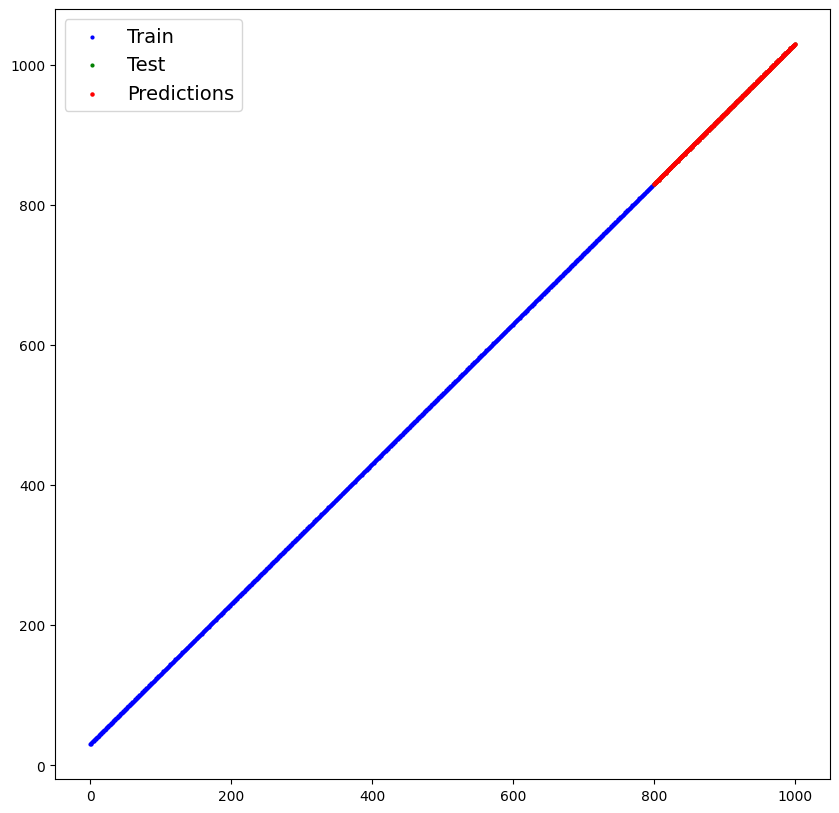

In [39]:

pp(X_train, Y_train, X_test, Y_test, Y_test)

In [ ]:
# Now lets create the predictions
# Create the model with linear regression
class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, tdype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, tdype=torch.float))
    
    # Forward functions define the computations of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# The goal of the model is to predict the correct weight and bias
# Il will adjust the weight and bias to get it correct
# With liear is using gradient decent to get to the ideal values
# l_model = LinearRegressionModel()
#predictions = l_model.forward(X_train)
# Print
pp(X_train, Y_train, X_test, Y_test, predictions)

TypeError: randn() received an invalid combination of arguments - got (int, requires_grad=bool, tdype=torch.dtype), but expected one of:
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, torch.Generator generator, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
